# Aplicacion 2: Circuito conmutado
En muchas aplicaciones de la electronica es comun el uso de un interruptor
o swiche para cambiar la estructura de un circuito y por lo tanto su
comportamiento. Considere el circuito de la figura:

La ecuacion diferencial que rige al voltaje en el capacitor, esta dada por
la siguiente expresion por tramos:<br>
$ C\frac{dV_{c}}{dt} = \left\{ \begin{array}\\ \frac{5}{R_{1}}-\frac{R_{1}+R_{2}}{R_{1}R_{2}} V_{c} \\ -\frac{1}{R_{2}} V_{c} \\ \end{array} \right. $<br>
Donde $ V(t) $ representa el voltaje en el capacitor y $ t $ el tiempo en segundos

- Seleccione valores para $ R_{1} $, $ R_{2} $ y $ C $, con $ R_{1} \neq R_{2} $.<br>
Los valores seleccionados son los siquientes:
- $ R_{1}:10 \Omega $
- $ R_{2}:20 \Omega $
- $ C : 0.1 F $


- Encuentre $ V_{c}(t) $ asumiedo que el circuito esta con
el interruptor cerrado para $ 0 < t < 2 $ y con el interruptor
abierto para $ t>2 $. Asuma tambien que el capacitor se encuentra descargado
incialmente $ (V_{c}=0) $. Tenga en cuenta que el voltaje en el capacitor es una variable continua, incluso
en el momento que se mueve el interruptor.

#### Solucion de la ecuacion diferencial
![Parte1](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo2/IMG_1828.PNG)
![Parte2](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo2/IMG_1829.PNG)

$ V_{c}(t) = \left\{ \begin{array}\\ \frac{10}{3}-\frac{10}{3} e^{-\frac{3}{2}t} & \mbox{if } \ 0<x<2 \ \\ 8.61e^{-\frac{t}{2}} & \mbox{if } \ x>2 \ \\ \end{array} \right. $


- Utilice Python para graficar la solucion de $ V(t) $. Analice: con el
interruptor cerrado el capacitor deberia cargarse (aumentar su energia
almacenada) y con el interruptor abierto descargarse (disminuir su energia
almacenada). Teniendo en cuenta que la energia almacenada esta
directamente relacionada con el voltaje en el capacitor y analizando las
graficas, ¿se cumple esta afirmacion?



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


t1 = np.linspace(0, 2, 1000)
t2 = np.linspace(2, 10, 1000)


def gra(t1, t2):

    Vc_cerrado = (10/3) - (10/3)*np.exp(-(3/2)*t1)
    Vc_abierto = 8.61*np.exp(-t2/2)

    fig, ax1 = plt.subplots()

    ax1.plot(t1, Vc_cerrado, label='cerrado')
    ax1.plot(t2, Vc_abierto, label='abierto')
    ax1.fill_between(t1,Vc_cerrado, alpha=0.3)
    ax1.fill_between(t2,Vc_abierto, alpha=0.3)

    ax1.set_title('Python')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Vc')

    ax1.legend()
    ax1.grid()

    plt.show()


##### La afirmacion se cumlple
Podemos observar que el voltaje en el capacitor aumenta cuando el interruptor esta
cerrado y por ende el area bajo la curva, que es la energia almacenada en el capacitor. Cuando
el interruptor se abre pasa lo contrario

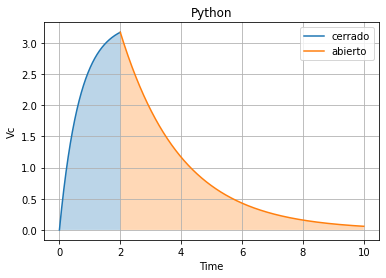

In [3]:
gra(t1, t2)


### Comparacion de resultados con OpenModelica
En el siguiente link esta el codigo usado en openmodelica para resolver
la ecuacion diferencial

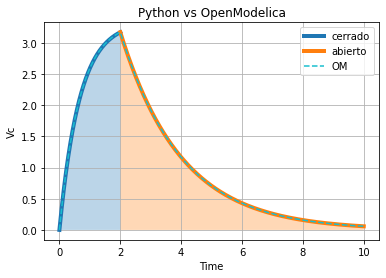

In [4]:
# link del archivo csv generado por OM guardado en github
csv_link_raw = 'https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo2/trabajo2_om_data.csv'

# Funcion que realiza la comparacion
def comparacion(t1, t2, csv_url):
    df = pd.read_csv(csv_url)

    vc_cerrado = (10/3) - (10/3)*np.exp(-(3/2)*t1)
    vc_abierto = 8.61*np.exp(-t2/2)

    fig2, ax1 = plt.subplots()

    ax1.plot(t1, vc_cerrado, label='cerrado', lw=4)
    ax1.plot(t2, vc_abierto, label='abierto', lw=4)

    ax1.plot(df['time'], df['Y'], label='OM', ls='--', color='#17becf')

    ax1.fill_between(t1,vc_cerrado, alpha=0.3)
    ax1.fill_between(t2,vc_abierto, alpha=0.3)
    ax1.set_title('Python vs OpenModelica')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Vc')
    ax1.legend()
    ax1.grid()

    plt.show()

comparacion(t1, t2, csv_link_raw)
